# this is a file for calculating the Lagrangian rate of change of the log-scale $Chl_a$ using  $\frac{D \ ( log_{e} Chl_a)}{Dt}:=\frac{1}{Chl_a}\frac{D \ ( Chl_a)}{Dt}$
* A few remarks:
  * Unit $mg/(m^3 \cdot day)$
  * Natural logarithm added
  * All the rates on the same time frequency
  * validate the rate of change of the log-scale rate Chl-a by FD
  * Monthly trends 
    * aaa
    * aaa

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import xarray as xr
from datetime import datetime
import datetime

/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# load the floats data 
# ********************
# *** CSV files ***
# ********************
# load the floats data, take the lon and lat as list out and calculate the distance

# load CSV output    
# some how the CSV Format has some compatibility issues here
# see readme file for the file convetion in the experiments,
# for instance "3" indicates distance is addd to the dataset 


plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()



# freqency
freq = 2
suf = 'D'
in_filename = 'df_chl_out_'+str(freq)+ suf +'_modisa_3.csv'
out_filename = 'df_chl_out_'+str(freq)+ suf +'_modisa_4.csv'
folder = './data_collector_modisa_chla9km/'
direc = folder + in_filename
direc

print('in_filename and path:', direc)
print('out_filename:', out_filename)

df_chl_out_3 = pd.read_csv(direc, index_col='index')
df_chl_out_3

in_filename and path: ./data_collector_modisa_chla9km/df_chl_out_2D_modisa_3.csv
out_filename: df_chl_out_2D_modisa_4.csv


,id,time,lon,ve,var_lon,var_tmp,vn,spd,var_lat,lat,temp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist
index,,,,,,,,,,,,,,,,
15828,34721,2002-11-03,67.570000,3.303000,0.000135,0.001823,2.865500,8.211375,0.000069,12.647250,29.435500,0.123307,-0.909012,-0.010569,NaN,514.4420
16081,34710,2002-11-05,63.160750,0.491500,0.000088,0.001596,10.219250,10.749875,0.000050,17.127000,28.991250,0.445077,-0.351565,0.033500,-1.474955,579.2250
16320,11089,2002-11-07,64.835375,-15.401500,0.000105,0.003391,2.263500,16.392000,0.000056,14.366875,28.939625,0.182671,-0.738330,0.024246,-1.615360,855.6750
16322,15707,2002-11-07,67.399125,-19.144750,0.000118,1000.000000,-21.695125,29.499000,0.000063,13.739500,NaN,0.161665,-0.791384,-0.004139,NaN,572.6910
16336,34315,2002-11-07,57.375375,-49.749875,0.000085,0.004589,4.788500,52.729375,0.000048,5.613000,29.647125,0.115356,-0.937960,-0.009359,NaN,824.3420
16340,34710,2002-11-07,63.170375,-0.728375,0.000148,0.001614,10.725375,11.110875,0.000075,17.297375,28.900250,0.376970,-0.423693,-0.068107,NaN,568.6320
16579,11089,2002-11-09,64.586375,-14.547875,0.000189,0.004779,-3.024000,15.786125,0.000090,14.356250,29.047125,0.194167,-0.711825,0.011496,-1.939453,878.5510
16581,15707,2002-11-09,67.213250,-5.045875,0.000183,1000.000000,-23.739500,24.623250,0.000089,13.350625,NaN,0.164932,-0.782695,0.003267,-2.485850,572.6400
16605,34721,2002-11-09,67.965125,13.566000,0.000215,0.002024,1.321875,15.994875,0.000099,12.587500,29.499125,0.143538,-0.843033,-0.006717,NaN,470.1010


In [3]:
# All the rates on the same time frequency
check1 = df_chl_out_3.chl_rate/ df_chl_out_3.chlor_a 
check1 = check1/ freq
check2 = df_chl_out_3.chl_rate.divide(freq *df_chl_out_3.chlor_a, axis = 'index')
# an check 
np.sum(abs(check1 - check2))

0.0

In [4]:
# add the column to the dataframe and output the dataset
df_chl_out_3['chlor_a_logE_rate'] = pd.Series(np.array(check2), index=df_chl_out_3.index)
df_chl_out_3.head()

,id,time,lon,ve,var_lon,var_tmp,vn,spd,var_lat,lat,temp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
15828,34721,2002-11-03,67.570000,3.303000,0.000135,0.001823,2.865500,8.211375,0.000069,12.647250,29.435500,0.123307,-0.909012,-0.010569,NaN,514.442,-0.042856
16081,34710,2002-11-05,63.160750,0.491500,0.000088,0.001596,10.219250,10.749875,0.000050,17.127000,28.991250,0.445077,-0.351565,0.033500,-1.474955,579.225,0.037634
16320,11089,2002-11-07,64.835375,-15.401500,0.000105,0.003391,2.263500,16.392000,0.000056,14.366875,28.939625,0.182671,-0.738330,0.024246,-1.615360,855.675,0.066365
16322,15707,2002-11-07,67.399125,-19.144750,0.000118,1000.000000,-21.695125,29.499000,0.000063,13.739500,NaN,0.161665,-0.791384,-0.004139,NaN,572.691,-0.012801
16336,34315,2002-11-07,57.375375,-49.749875,0.000085,0.004589,4.788500,52.729375,0.000048,5.613000,29.647125,0.115356,-0.937960,-0.009359,NaN,824.342,-0.040566


In [5]:
df_chl_out_3.chlor_a_logE_rate.describe()  # more scattered on the left hand side

count    805.000000
mean      -0.190115
std        1.170185
min      -15.737468
25%       -0.095636
50%       -0.005724
75%        0.082394
max        0.491977
Name: chlor_a_logE_rate, dtype: float64

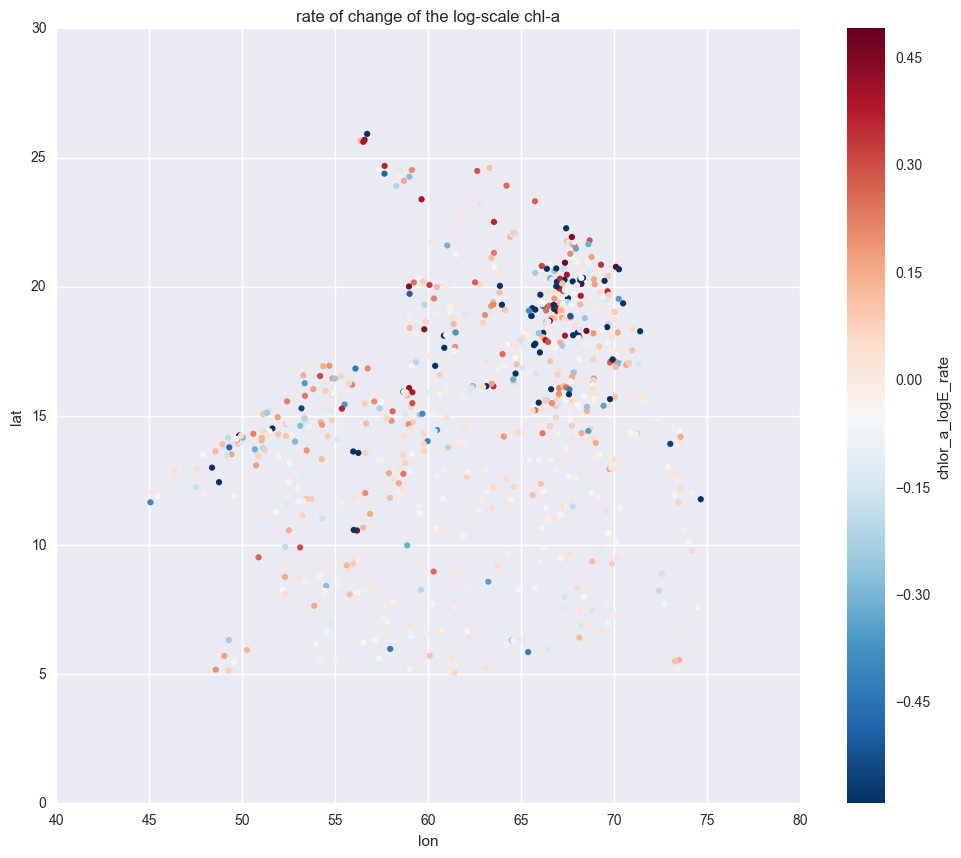

In [6]:
# visualize the ROC of log(chl_a) around the arabian sea region
fig, ax  = plt.subplots(figsize=(12,10))
df_chl_out_3.plot(kind='scatter', x='lon', y='lat', c='chlor_a_logE_rate', cmap='RdBu_r', vmin=check2.median()-0.5*check2.std(), vmax=check2.max(), edgecolor='none', ax=ax, title = 'rate of change of the log-scale chl-a')

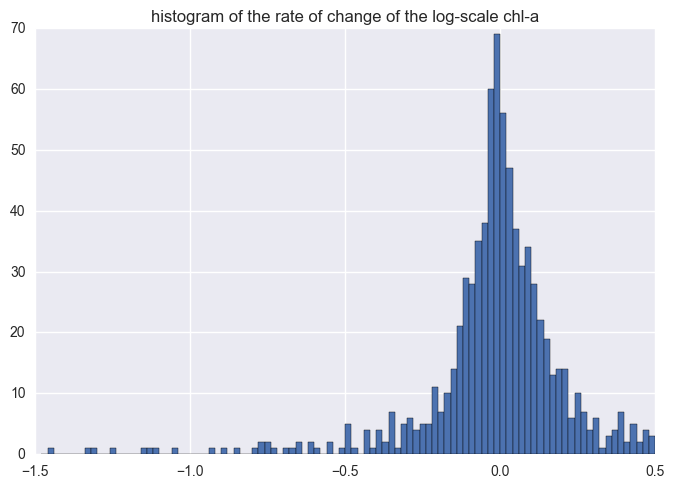

In [7]:
# histogram for non standarized data
axdf_chl = df_chl_out_3.chlor_a_logE_rate.dropna().hist(bins=100,range=[-1.5,0.5]) # there are very a few small values on the left
axdf_chl.set_title('histogram of the rate of change of the log-scale chl-a')

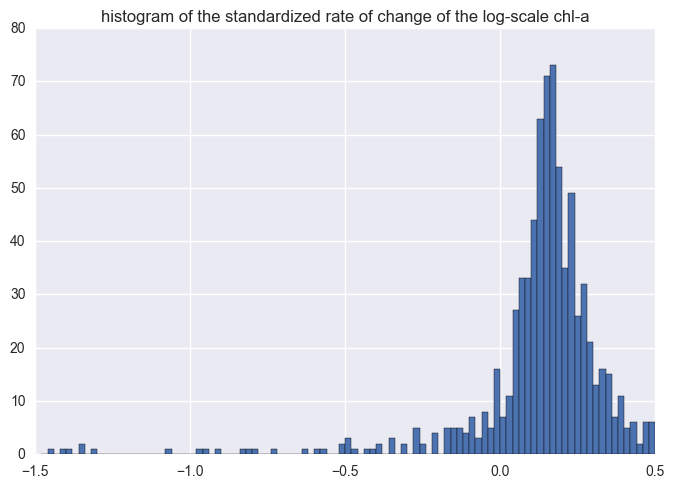

In [8]:
# standarized series
tmp = df_chl_out_3.chlor_a_logE_rate.dropna()
tmp = (tmp - tmp.mean())/tmp.std()
axdf_chl_stdan = tmp.hist(bins=100,range=[-1.5,0.5])   # there are very a few small values on the left
axdf_chl_stdan.set_title('histogram of the standardized rate of change of the log-scale chl-a')

In [12]:
(np.log(0.194167)-np.log(0.182671))/freq


0.030515946441101893

In [13]:
###########################
# On 2D-subsampling Dataset
###########################
# Val 1:
# id:11089, time:2002-11-07"
# (0.194167 - 0.182671) / (freq*0.194167)    == 0.02960338265
#########
# Val 2:
# id:11089, time:2002-11-07"
# (np.log(0.194167)-np.log(0.182671))   / freq == 0.030515946441101893 # very close to the value above

df_chl_out_3.sort_values(by=['id', 'time']).head()

,id,time,lon,ve,var_lon,var_tmp,vn,spd,var_lat,lat,temp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
16836,10206,2002-11-11,67.132250,0.870375,0.001112,1000.000000,0.028125,1.862250,0.000387,11.153750,NaN,0.125101,-0.902739,-0.010332,NaN,540.828,-0.041295
23311,10206,2002-12-31,64.190250,-11.078750,0.001012,1000.000000,-3.439750,11.838875,0.000368,12.543625,NaN,0.171085,-0.766787,0.016540,-1.781477,874.995,0.048337
16320,11089,2002-11-07,64.835375,-15.401500,0.000105,0.003391,2.263500,16.392000,0.000056,14.366875,28.939625,0.182671,-0.738330,0.024246,-1.615360,855.675,0.066365
16579,11089,2002-11-09,64.586375,-14.547875,0.000189,0.004779,-3.024000,15.786125,0.000090,14.356250,29.047125,0.194167,-0.711825,0.011496,-1.939453,878.551,0.029603
16838,11089,2002-11-11,64.346000,-17.929000,0.000106,0.003450,-3.980500,18.692500,0.000056,14.287500,28.949875,0.192742,-0.715024,-0.001425,NaN,866.441,-0.003697


In [14]:
# convert into datetime
df_chl_out_3['time'] = pd.to_datetime(df_chl_out_3['time']) # ,format='%m/%d/%y %I:%M%p'
df_chl_out_3.sort_values(by=['id', 'time']).head()  # a check

,id,time,lon,ve,var_lon,var_tmp,vn,spd,var_lat,lat,temp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
16836,10206,2002-11-11,67.132250,0.870375,0.001112,1000.000000,0.028125,1.862250,0.000387,11.153750,NaN,0.125101,-0.902739,-0.010332,NaN,540.828,-0.041295
23311,10206,2002-12-31,64.190250,-11.078750,0.001012,1000.000000,-3.439750,11.838875,0.000368,12.543625,NaN,0.171085,-0.766787,0.016540,-1.781477,874.995,0.048337
16320,11089,2002-11-07,64.835375,-15.401500,0.000105,0.003391,2.263500,16.392000,0.000056,14.366875,28.939625,0.182671,-0.738330,0.024246,-1.615360,855.675,0.066365
16579,11089,2002-11-09,64.586375,-14.547875,0.000189,0.004779,-3.024000,15.786125,0.000090,14.356250,29.047125,0.194167,-0.711825,0.011496,-1.939453,878.551,0.029603
16838,11089,2002-11-11,64.346000,-17.929000,0.000106,0.003450,-3.980500,18.692500,0.000056,14.287500,28.949875,0.192742,-0.715024,-0.001425,NaN,866.441,-0.003697


In [15]:
# CSV CSV CSV CSV with specfic index
# df_chl_out_3.csv --  {lat, lon, temp, chl_rate, dist}
# df_chl_out_3.csv --  {lat, lon, temp, chl_rate, dist, chlor_a_log10_rate}

# 3 represents 3 features: {temp, chl_rate, dist}
# 4 represents 4 features: {temp, chl_rate, dist, chlor_a_log10_rate }
print('out_filename:', out_filename)
df_chl_out_3.to_csv(out_filename, sep=',', index_label = 'index')

# load CSV output
test = pd.read_csv(out_filename, index_col='index')

# a check
test.sort_values(by=['id', 'time']).head()

out_filename: df_chl_out_2D_modisa_4.csv


,id,time,lon,ve,var_lon,var_tmp,vn,spd,var_lat,lat,temp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
16836,10206,2002-11-11,67.132250,0.870375,0.001112,1000.000000,0.028125,1.862250,0.000387,11.153750,NaN,0.125101,-0.902739,-0.010332,NaN,540.828,-0.041295
23311,10206,2002-12-31,64.190250,-11.078750,0.001012,1000.000000,-3.439750,11.838875,0.000368,12.543625,NaN,0.171085,-0.766787,0.016540,-1.781477,874.995,0.048337
16320,11089,2002-11-07,64.835375,-15.401500,0.000105,0.003391,2.263500,16.392000,0.000056,14.366875,28.939625,0.182671,-0.738330,0.024246,-1.615360,855.675,0.066365
16579,11089,2002-11-09,64.586375,-14.547875,0.000189,0.004779,-3.024000,15.786125,0.000090,14.356250,29.047125,0.194167,-0.711825,0.011496,-1.939453,878.551,0.029603
16838,11089,2002-11-11,64.346000,-17.929000,0.000106,0.003450,-3.980500,18.692500,0.000056,14.287500,28.949875,0.192742,-0.715024,-0.001425,NaN,866.441,-0.003697


In [16]:
## check the week numbers of the range from Nov-01-01 to Mar-01-01
for year in range(2002, 2017):
    print(str(year)+'-11-01 is week', datetime.datetime(year, 11, 1).isocalendar()[1])  # 44, 45, 

print('----')
for year in range(2002, 2017):
    print(str(year)+'-3-31 is week', datetime.datetime(year, 3, 31).isocalendar()[1])  # 13, 14

plt.show()

2002-11-01 is week 44
2003-11-01 is week 44
2004-11-01 is week 45
2005-11-01 is week 44
2006-11-01 is week 44
2007-11-01 is week 44
2008-11-01 is week 44
2009-11-01 is week 44
2010-11-01 is week 44
2011-11-01 is week 44
2012-11-01 is week 44
2013-11-01 is week 44
2014-11-01 is week 44
2015-11-01 is week 44
2016-11-01 is week 44
----
2002-3-31 is week 13
2003-3-31 is week 14
2004-3-31 is week 14
2005-3-31 is week 13
2006-3-31 is week 13
2007-3-31 is week 13
2008-3-31 is week 14
2009-3-31 is week 14
2010-3-31 is week 13
2011-3-31 is week 13
2012-3-31 is week 13
2013-3-31 is week 13
2014-3-31 is week 14
2015-3-31 is week 14
2016-3-31 is week 13


the min and max of the week index is 1, 53 :


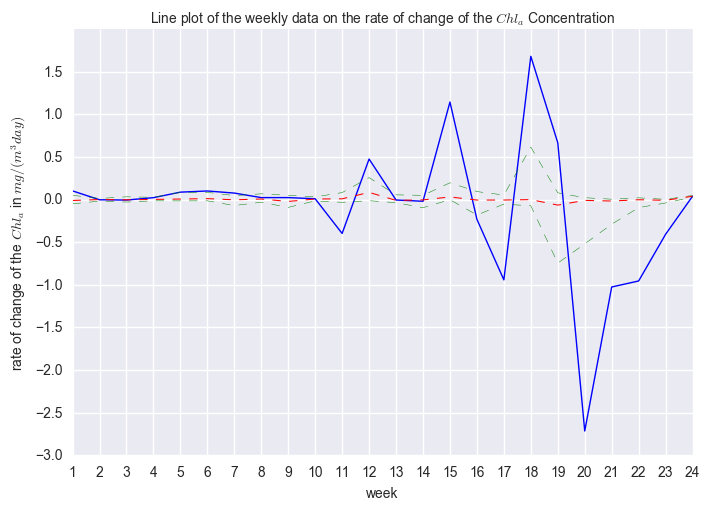

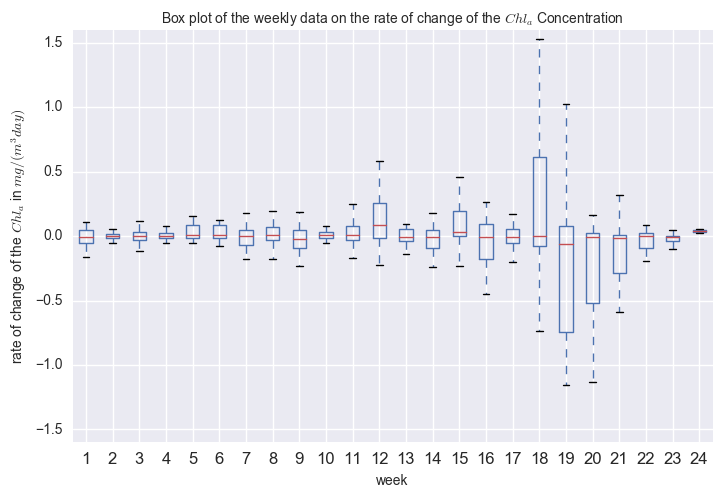

In [20]:
##### weekly plot on the Lagrangian rate of change of the chl-a
#sns.set(style="white")
#sns.set(color_codes=True)

### 
# Approach 1 depreciated
#grouped = df_timed.chl_rate.groupby(df_timed.index.week)
#grouped.plot.box()

### 
# Approach 2
# prepare data  a. use index or columns to group

###
# select the corresponding weeks, prepare the data
df_timed = df_chl_out_3.set_index('time')
df_timed['week'] = df_timed.index.week

mask_NovMar = (df_timed.week<=14) | (df_timed.week >=44)
df_timed_NovMar = df_timed[mask_NovMar]
#df_timed_NovMar.head()

# now rotate the index to make Nov-01-01 the first month
print('the min and max of the week index is %d, %d :' % (df_timed_NovMar.week.min(), df_timed_NovMar.week.max()) )
# make the 44th week the 1st week
df_timed_NovMar['week_rotate'] = (df_timed_NovMar.week + 10 ) % 53
df_timed_NovMar.week_rotate.describe() # now from 1 to 24


axes1=df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].mean().plot(linestyle="-",color='b', linewidth=1)
df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].quantile(.75).plot(linestyle="--",color='g', linewidth=0.35)
df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].quantile(.50).plot(linestyle="--",color='r', linewidth=0.75)
df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].quantile(.25).plot(linestyle="--",color='g', linewidth=0.35)
axes1.set_ylim(-3,2)
axes1.set_title("Line plot of the weekly data on the rate of change of the $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
plt.yticks(np.arange(-3, 2, 0.5))
plt.xticks(np.arange(1, 25, 1))
plt.show()


# http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html
#http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
axes2 = df_timed_NovMar.boxplot(column='chl_rate', by='week_rotate')
plt.suptitle("") # equivalent
axes2.set_ylim(-1.6,1.6)
axes2.set_title("Box plot of the weekly data on the rate of change of the $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
plt.show()

# the rate of change is slower on the regular scale

#matplotlib.pyplot.close("all")

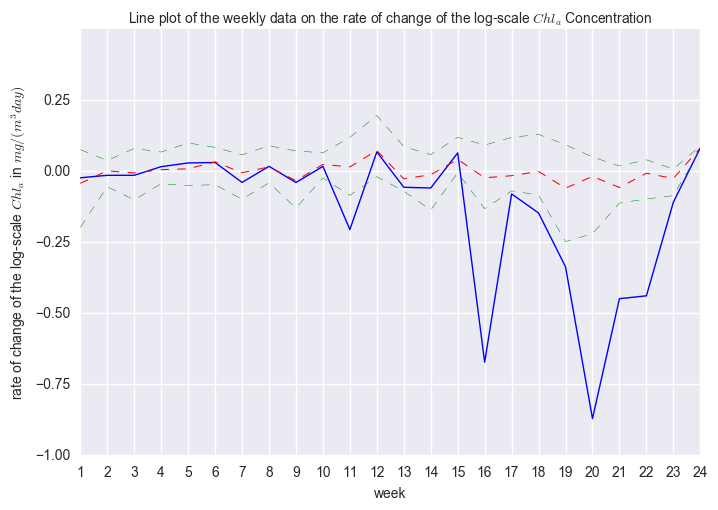

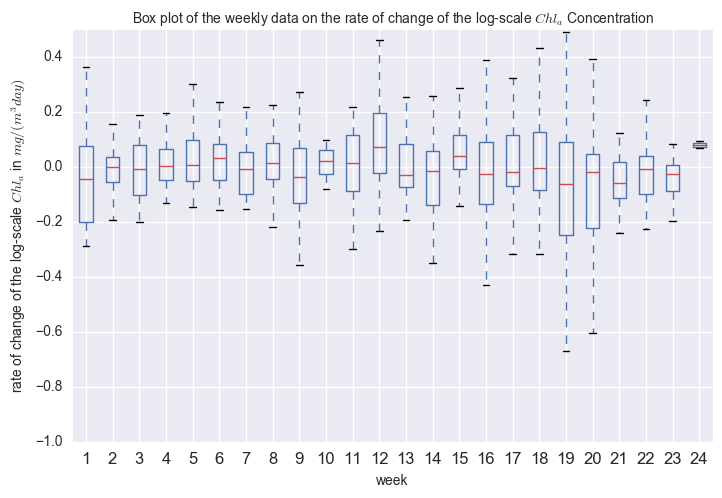

In [19]:
# weekly plot on the Lagrangian rate of change of the log-scale chl-a
# This is the rate of change on the exponential scale
axes1=df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].mean().plot(linestyle="-",color='b', linewidth=1)
df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].quantile(.75).plot(linestyle="--",color='g', linewidth=0.35)
df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].quantile(.50).plot(linestyle="--",color='r', linewidth=0.75)
df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].quantile(.25).plot(linestyle="--",color='g', linewidth=0.35)
axes1.set_ylim(-1,0.5)
axes1.set_title("Line plot of the weekly data on the rate of change of the log-scale $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the log-scale $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
plt.yticks(np.arange(-1, 0.5, 0.25))
plt.xticks(np.arange(1, 25, 1))
#plt.show()


# http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html
#http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
axes2 = df_timed_NovMar.boxplot(column='chlor_a_logE_rate', by='week_rotate')
plt.suptitle("") # equivalent
axes2.set_ylim(-1,0.5)
axes2.set_title("Box plot of the weekly data on the rate of change of the log-scale $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the log-scale $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
#plt.show()


#plt.close('all')

In [21]:
plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()



 summary of the Chl_rate 
 count    119.000000
mean       0.021413
std        0.174320
min       -0.269799
25%       -0.026604
50%       -0.000852
75%        0.033310
max        1.684376
Name: chl_rate, dtype: float64


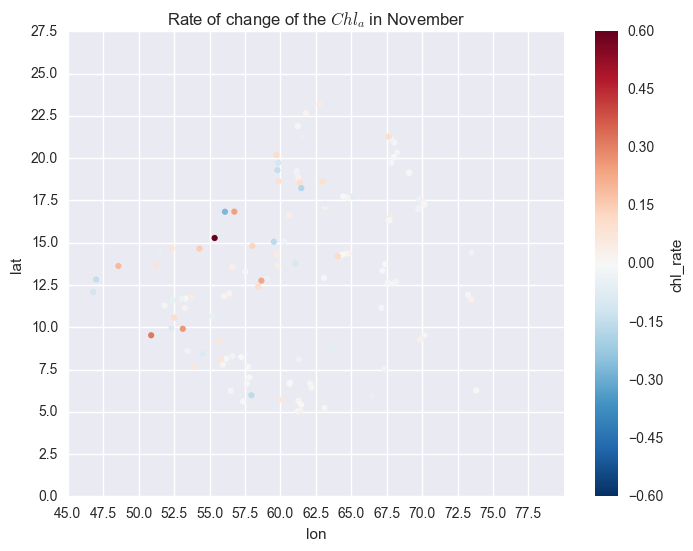



 summary of the Chl_rate 
 count    144.000000
mean       0.059732
std        0.598350
min       -3.367546
25%       -0.041924
50%        0.001460
75%        0.071871
max        4.861381
Name: chl_rate, dtype: float64


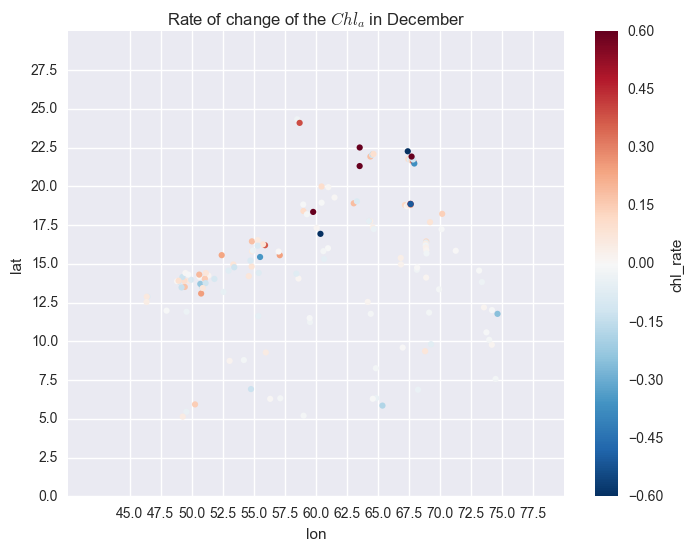



 summary of the Chl_rate 
 count    177.000000
mean       0.002020
std        1.359429
min      -12.726983
25%       -0.047666
50%        0.006902
75%        0.108919
max       11.152574
Name: chl_rate, dtype: float64


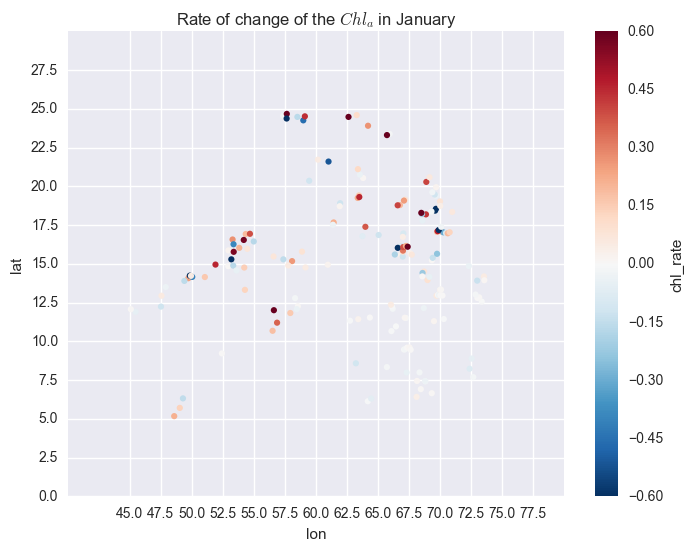



 summary of the Chl_rate 
 count    196.000000
mean       0.465178
std        8.483293
min      -39.506426
25%       -0.129237
50%       -0.002522
75%        0.099199
max       44.944229
Name: chl_rate, dtype: float64


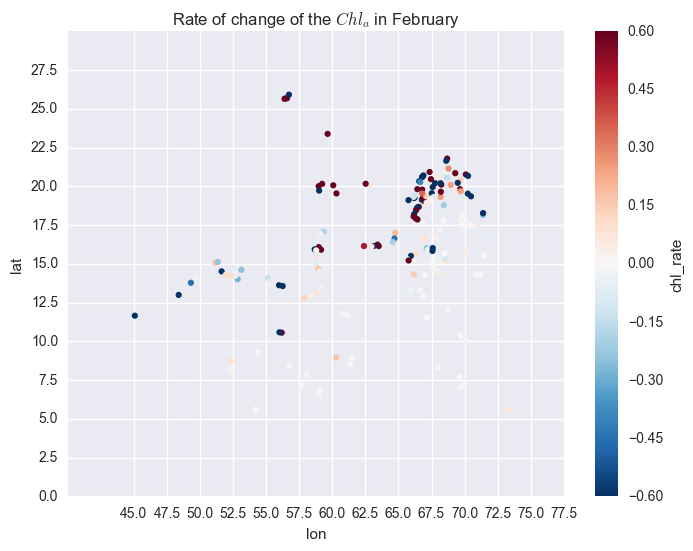



 summary of the Chl_rate 
 count    169.000000
mean      -0.938410
std        6.009227
min      -26.998233
25%       -0.119928
50%       -0.008352
75%        0.015741
max       31.032281
Name: chl_rate, dtype: float64


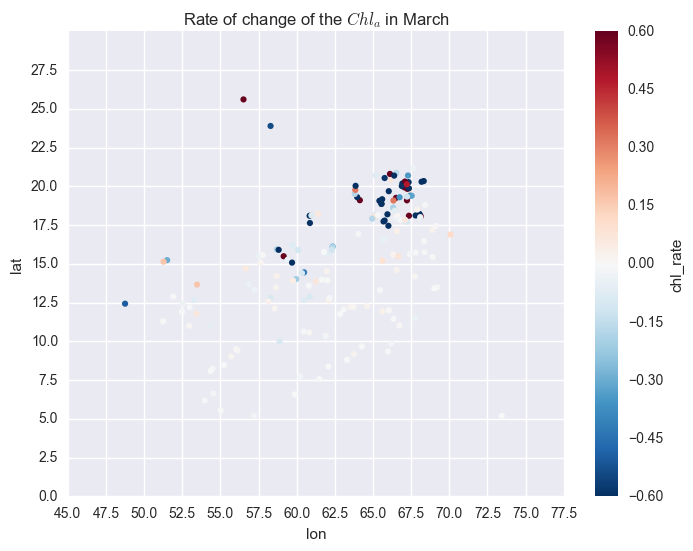

In [22]:
# spatial plot for different months --  totally five months 1, 2, 3, 11, 12, 
for i in range(0,5,1):
    month_ind = np.array([11,12,1,2,3])
    month_names = ['November', 'December','January','February', 'March']
    aa = df_timed_NovMar[df_timed_NovMar.index.month == month_ind[i]]
    fig, ax  = plt.subplots(figsize=(8,6))
    ##aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=aa.chl_rate.median()-0.5*aa.chl_rate.std(), vmax=aa.chl_rate.median()-0.5*aa.chl_rate.std(), edgecolor='none', ax=ax, title = 'rate of change of the $Chl_a$')
    ##aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=aa.chl_rate.mean()-0.5*aa.chl_rate.std(), vmax=aa.chl_rate.mean()+0.5*aa.chl_rate.std(), edgecolor='none', ax=ax, title = 'rate of change of the $Chl_a$')
    print('\n\n summary of the Chl_rate \n', aa.chl_rate.describe())
    aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=-0.6, vmax=0.6, edgecolor='none', ax=ax, title = 'Rate of change of the $Chl_a$ in %s' % (month_names[i]))
    plt.xticks(np.arange(45, 80, 2.5))
    plt.yticks(np.arange(0, 28, 2.5))
    plt.show()

In [158]:
print("test")

test
